In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df["target_names"] = df.target.apply(lambda x : iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [4]:
X = df.drop(columns=["target", "target_names"])
model = KMeans(n_clusters=3)
scaler = MinMaxScaler()

In [5]:
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=iris.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [6]:
X["pred"] = model.fit_predict(X)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),pred
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,0
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,0
148,0.527778,0.583333,0.745763,0.916667,0


In [7]:
d_reduced = PCA(n_components=2)
PCA_data = d_reduced.fit_transform(X)

In [8]:
PCA_df = pd.DataFrame(PCA_data, columns=["pca1", "pca2"])
PCA_df

,pca1,pca2
0,0.038942,0.652882
1,0.015562,0.629557
2,0.013316,0.679326
3,0.009892,0.660303
4,0.038663,0.672568
...,...,...
145,1.229301,-0.332717
146,-0.776787,-0.563177
147,1.206470,-0.232511
148,1.228020,-0.264040


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

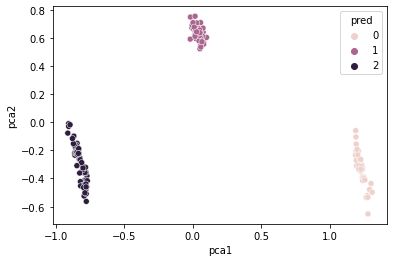

In [9]:
sn.scatterplot(x="pca1", y="pca2", hue=X['pred'], data=PCA_df)

In [12]:
a =[]
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(X)
    a.append(model.inertia_)
a

[137.93944375470664,
 51.735423457108034,
 6.982216473785234,
 5.7193194072825175,
 4.785661757098651,
 4.068546536373849,
 3.667915393571422,
 3.3486899314651097,
 3.055896507384612,
 2.74848514233744]

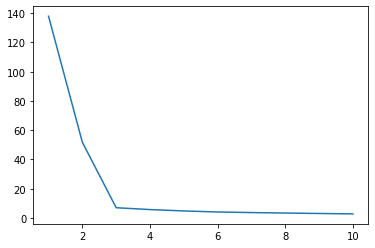

In [14]:
plt.plot(range(1,11), a)